### ASTR 3300/ PHYS 5300-003: Astrostatistics
***N. Pol***
___

# Homework 7
### Due: Friday, Apr. 4, at 11.59pm CT
---

This is a regression problem. Many of the parts require minor variations of code to switch to new techniques, but otherwise using a similar workflow. 

Note of warning: the data I have provided have associated uncertainties, `yerr`. `sklearn` and `astroML` have different formats for using uncertainties; in `sklearn` fitting you can provide `sample_weight=1/yerr**2`, while in `astroML` fitting you can directly provide `y_error=yerr`.

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.


2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?


3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

In [1]:
# install the relevant interactive plot packages
# only do this once
# !pip install ipywidgets ipympl
# !pip install PyMC3
# !pip install ipywidgets matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import ipywidgets
%config InlineBackend.figure_format='retina'

1. Read in `hw7_data_1.npy`. The dataset should consist of $500$ samples. The first two columns are the two data features, `X`. The third column is the target labels, `y`, and the final column are the heteroscedastic uncertainties on the labels, `yerr`. Make a 2-panel scatter plot of the labels versus each feature.

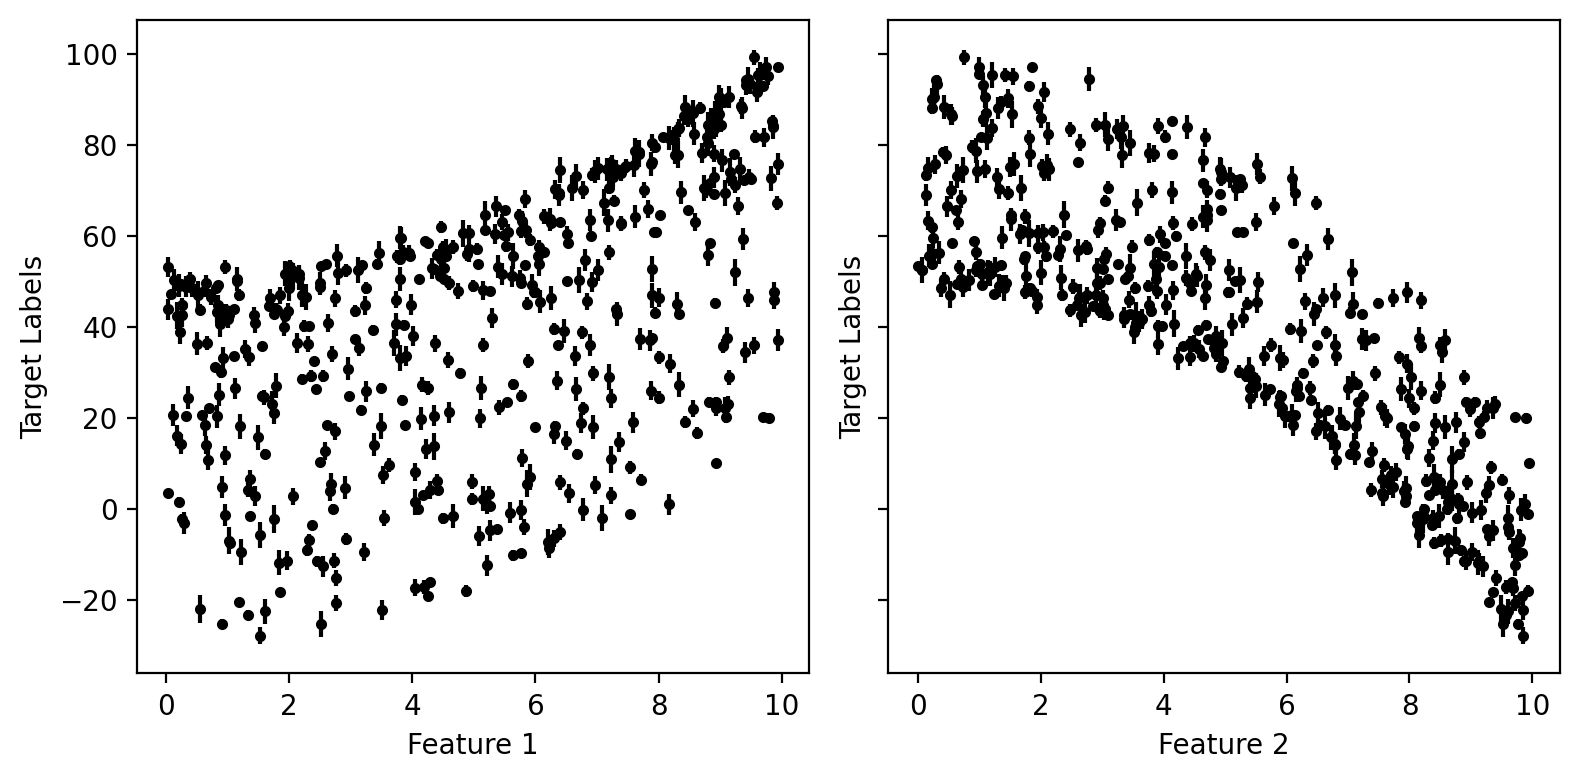

In [3]:
data = np.load('./hw_data/hw7_data_1.npy')
X = data[:,:2]
y = data[:,2]
yerr = data[:,3]
# data.shape

fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

ax[0].errorbar(X[:,0],y,yerr,fmt='.',c='black')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Target Labels')
ax[1].errorbar(X[:,1],y,yerr,fmt='.',c='black')
ax[1].set_xlabel('Feature 2')
ax[1].set_ylabel('Target Labels')
plt.tight_layout()
plt.show()

2. Use multivariate linear regression on this data with its uncertainties (`astroML` rather than plain `sklearn` is the better option here). Print the best-fit intercept and slopes for the features. Make a prediction `Xgrid` over $50$ values from the min to the max value of each feature, and plot the best-fit model on a duplicate of the $2$-panel plot from (1); does this look like a good description of the data?

/Users/tejassewak/miniconda3/envs/astr3300/lib/python3.12/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


Best Fit Values (Intercept, Slope1, Slope2): [57.10102323  4.94873016 -8.30023407]


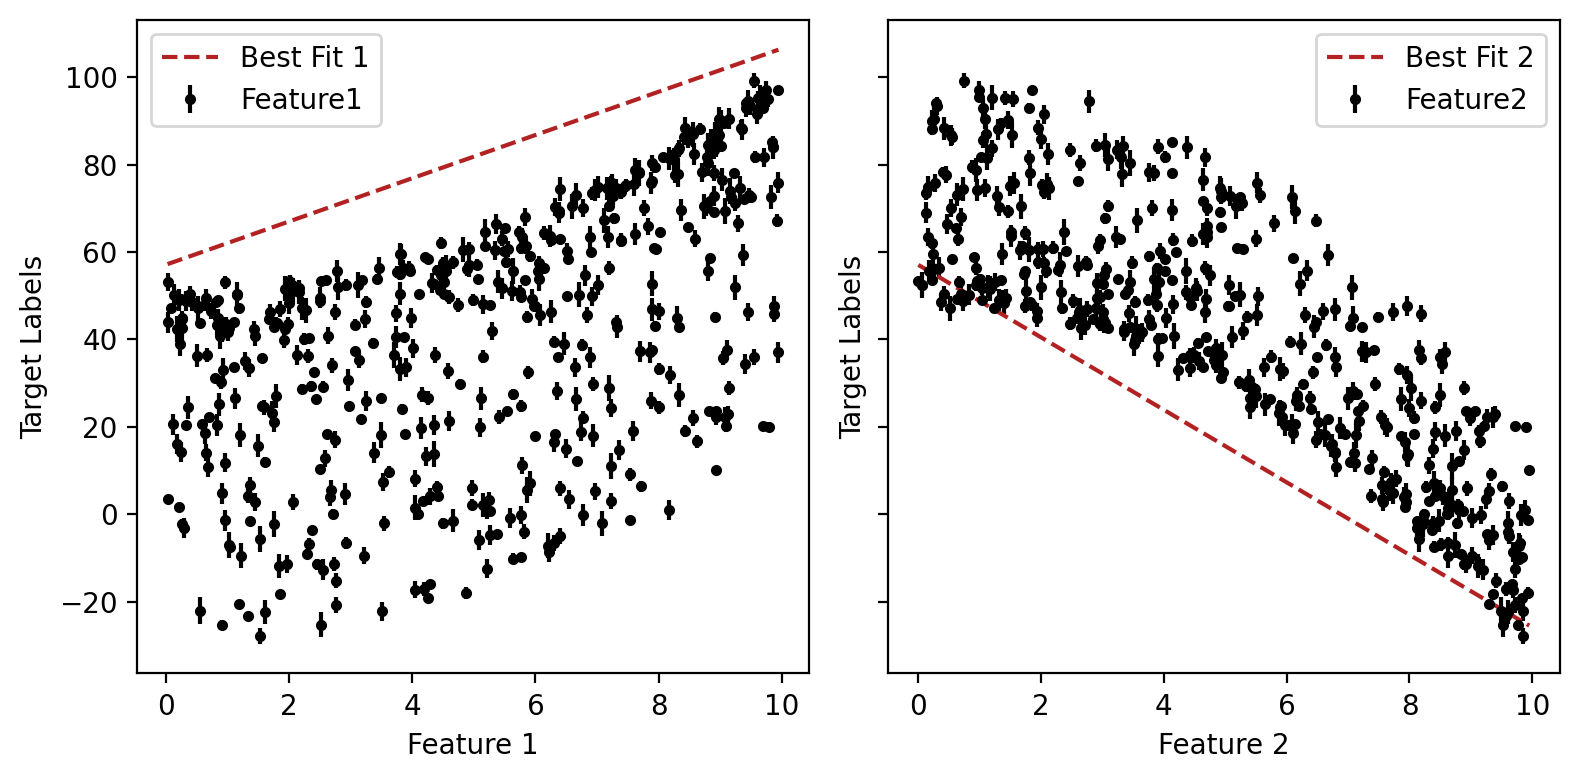

The mulitvariate fitted model does not look like a good description of the data


In [4]:
from astroML.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X,y,yerr) # Perform Multivariate Linear Regression
print("Best Fit Values (Intercept, Slope1, Slope2):",model_LR.coef_)
i,s1,s2 = model_LR.coef_
Xgrid1 = np.linspace(np.min(X[:,0]),np.max(X[:,0]),50)
Xgrid2 = np.linspace(np.min(X[:,1]),np.max(X[:,1]),50)

fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

ax[0].errorbar(X[:,0],y,yerr,fmt='.',c='black',label='Feature1')
ax[0].plot(Xgrid1, Xgrid1*s1 + i,c='firebrick',ls='--',label='Best Fit 1') 
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Target Labels')
ax[0].legend()
ax[1].errorbar(X[:,1],y,yerr,fmt='.',c='black',label='Feature2')
ax[1].plot(Xgrid2, Xgrid2*s2 + i,c='firebrick',ls='--',label='Best Fit 2')
ax[1].set_xlabel('Feature 2')
ax[1].set_ylabel('Target Labels')
ax[1].legend()
plt.tight_layout()
plt.show()

print("The mulitvariate fitted model does not look like a good description of the data")

3. Make a new two-dimensional prediction meshgrid `Xgrid` over the $2$-D feature space, use your best-fit model to predict the labels, and make a $3$-D interactive plot showing the data and your best-fit over the entire space. You may find the following code useful.

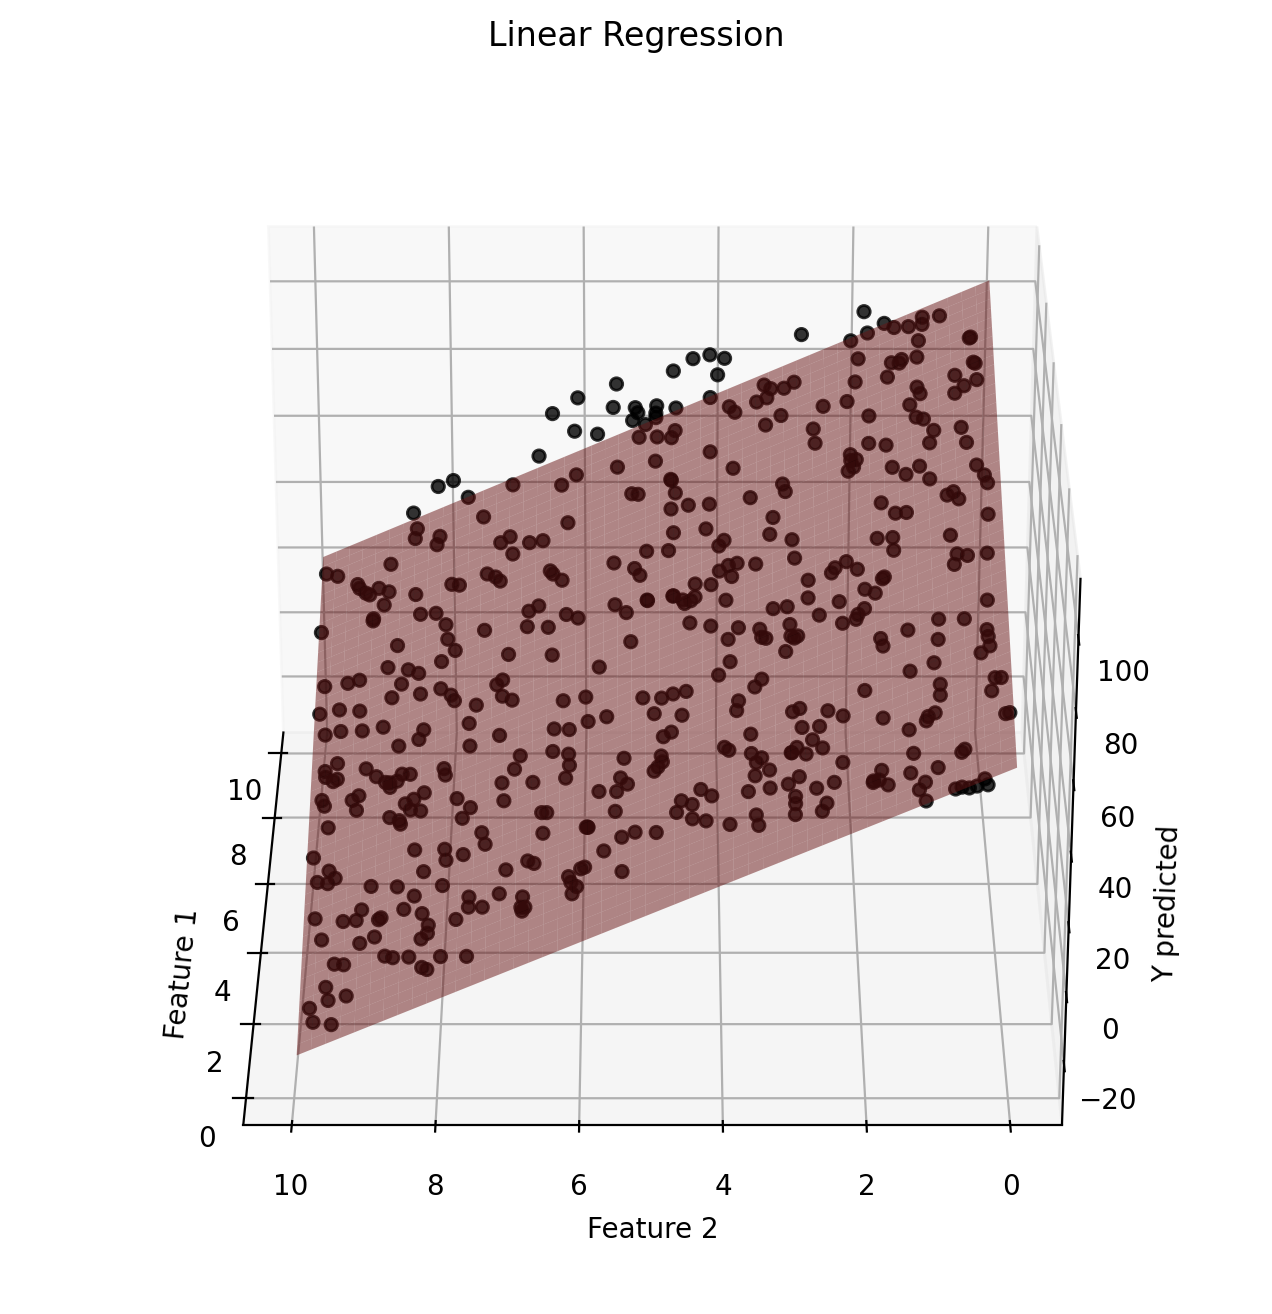

In [5]:
from mpl_toolkits.mplot3d import Axes3D # to change the inclination

# 3-d interactive plot provided did not work, used online resources and ChatGPT's help to make a 3-d plot.
Xgrid1_new, Xgrid2_new = np.meshgrid(Xgrid1, Xgrid2)
Xgrid = np.column_stack([Xgrid1_new.ravel(), Xgrid2_new.ravel()])
ypred = model_LR.predict(Xgrid).reshape(Xgrid1_new.shape)

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='black', alpha=0.8, label='Features')
ax.plot_surface(Xgrid1_new, Xgrid2_new, ypred, color='firebrick', alpha=0.5)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Y predicted')
ax.set_title('Linear Regression')

# Set the elevation and azimuthal angle
ax.view_init(elev=28, azim=180)

# Show the plot
plt.show()


4. Sticking with a linear model, now attempt a `GridSearchCV` procedure on the data to find the best `Ridge` regression hyper-parameters. Use the following `param_grid`:
```
ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}
```
What are the `best_params_` and the `best_score_` from this? Fit the data with the best options, and visualize interactively. Try `RidgeCV` also; what cross-validated `alpha_` does it return, and does this agree with `GridSeachCV`? *(Hint: remember to revert to inline matplotlib when you're done each time you make an interactive plot.)*


Best Params: {'alpha': 1.0, 'solver': 'svd'}
Best Score: 0.9290800590702192


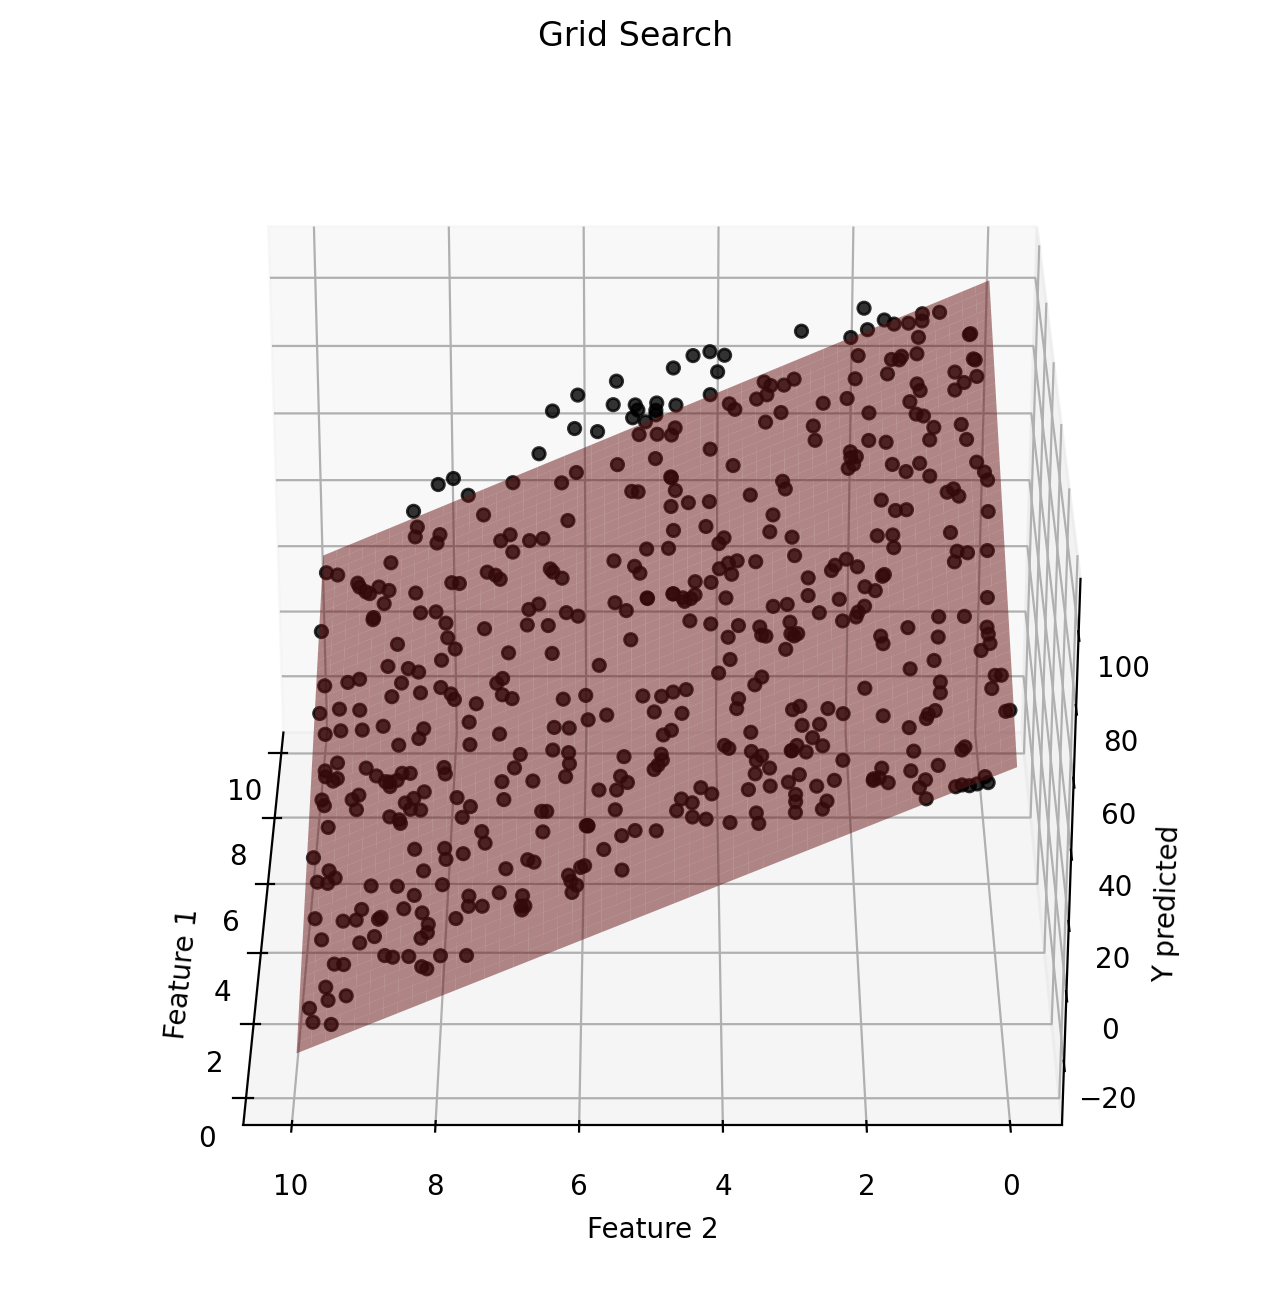

Best Params for RidgeCV: 1.0
Best Score for RidgeCV: 0.9309222374743998


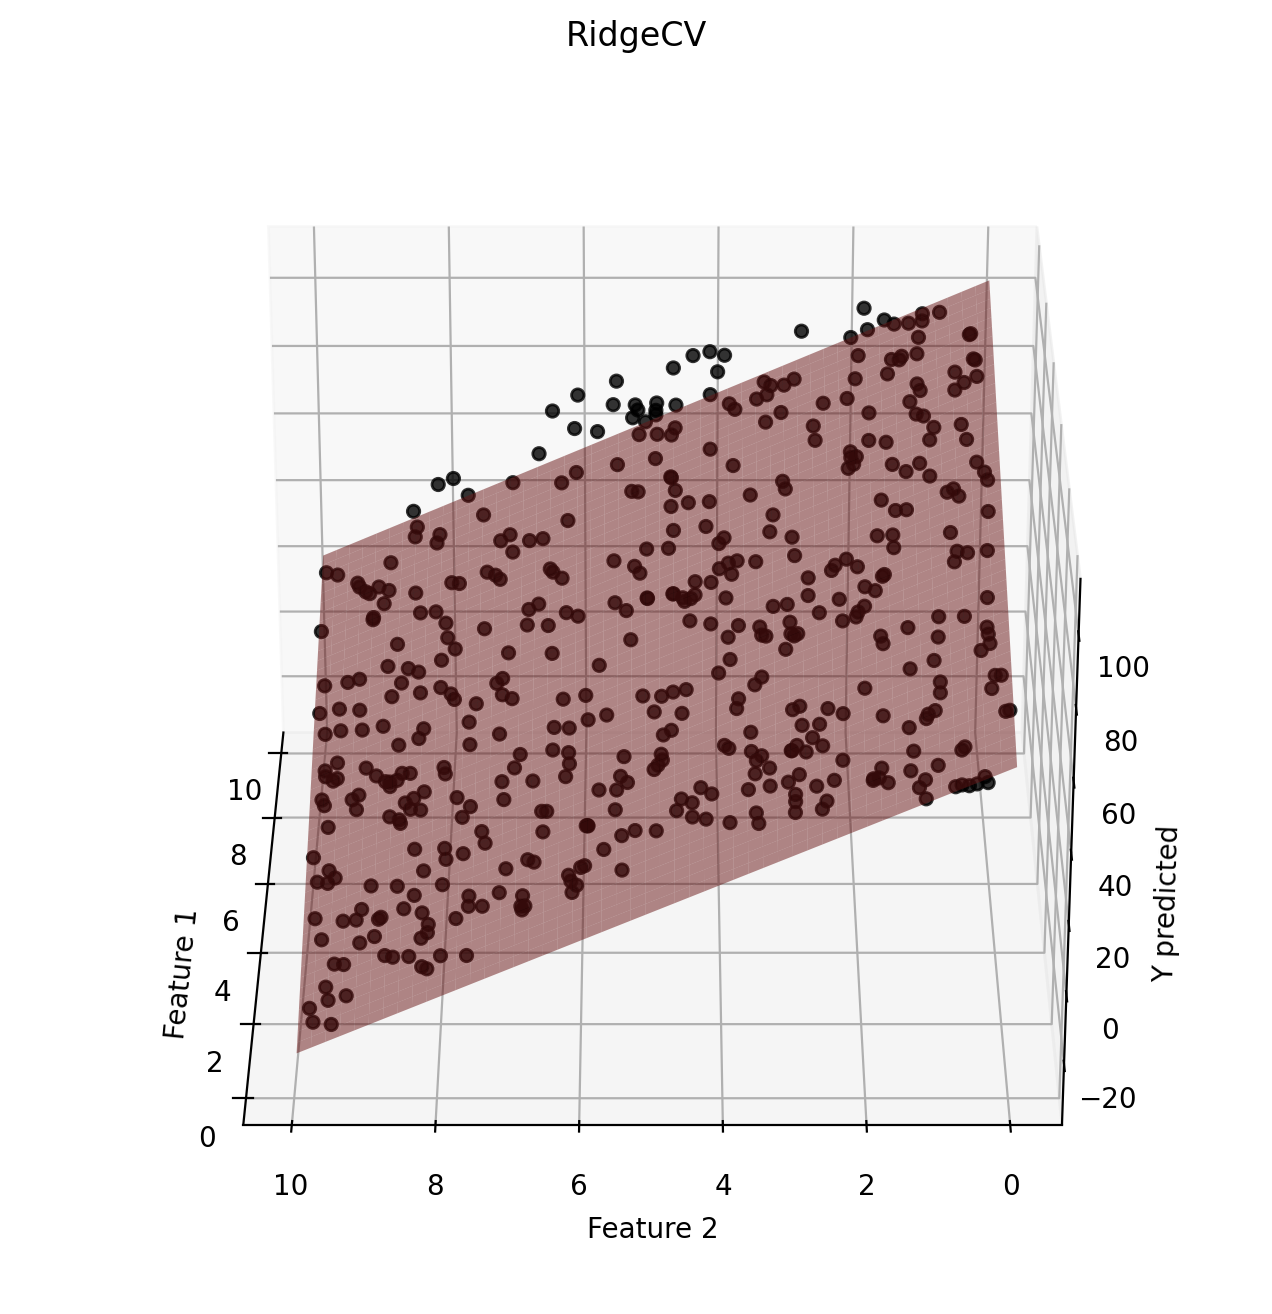

GridSearch and RidgeCV agree


In [6]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import GridSearchCV

ridge_params = {'alpha': [0.05,0.1,0.2,0.5,1.0], 'solver': ['svd', 'lsqr']}

K = 5
grid = GridSearchCV(Ridge(), ridge_params, cv=K) 
grid.fit(X,y) 

print("Best Params:",grid.best_params_) # finding best ridge parameters
print("Best Score:",grid.best_score_)

ypred = grid.predict(Xgrid).reshape(Xgrid1_new.shape)

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='black', alpha=0.8, label='Features')
ax.plot_surface(Xgrid1_new, Xgrid2_new, ypred, color='firebrick', alpha=0.5)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Y predicted')
ax.set_title('Grid Search')

# Set the elevation and azimuthal angle
ax.view_init(elev=28, azim=180)

# Show the plot
plt.show()

# RidgeCV

model_RC = RidgeCV([0.05,0.1,0.2,0.5,1.0])
model_RC.fit(X,y)

print("Best Params for RidgeCV:",model_RC.alpha_) # finding best ridge parameters
print("Best Score for RidgeCV:",model_RC.score(X,y))

ypred = model_RC.predict(Xgrid).reshape(Xgrid1_new.shape)

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='black', alpha=0.8, label='Features')
ax.plot_surface(Xgrid1_new, Xgrid2_new, ypred, color='firebrick', alpha=0.5)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Y predicted')
ax.set_title('RidgeCV')

# Set the elevation and azimuthal angle
ax.view_init(elev=28, azim=180)

# Show the plot
plt.show()


print("GridSearch and RidgeCV agree")

5. Now model the data using Gaussian process regression and the default kernel. Check what the fit looks like with and with and without uncertainties accounted for. *(Hint: GPR in `sklearn` takes an `alpha` parameter equal to `(yerr/y)**2`.)*

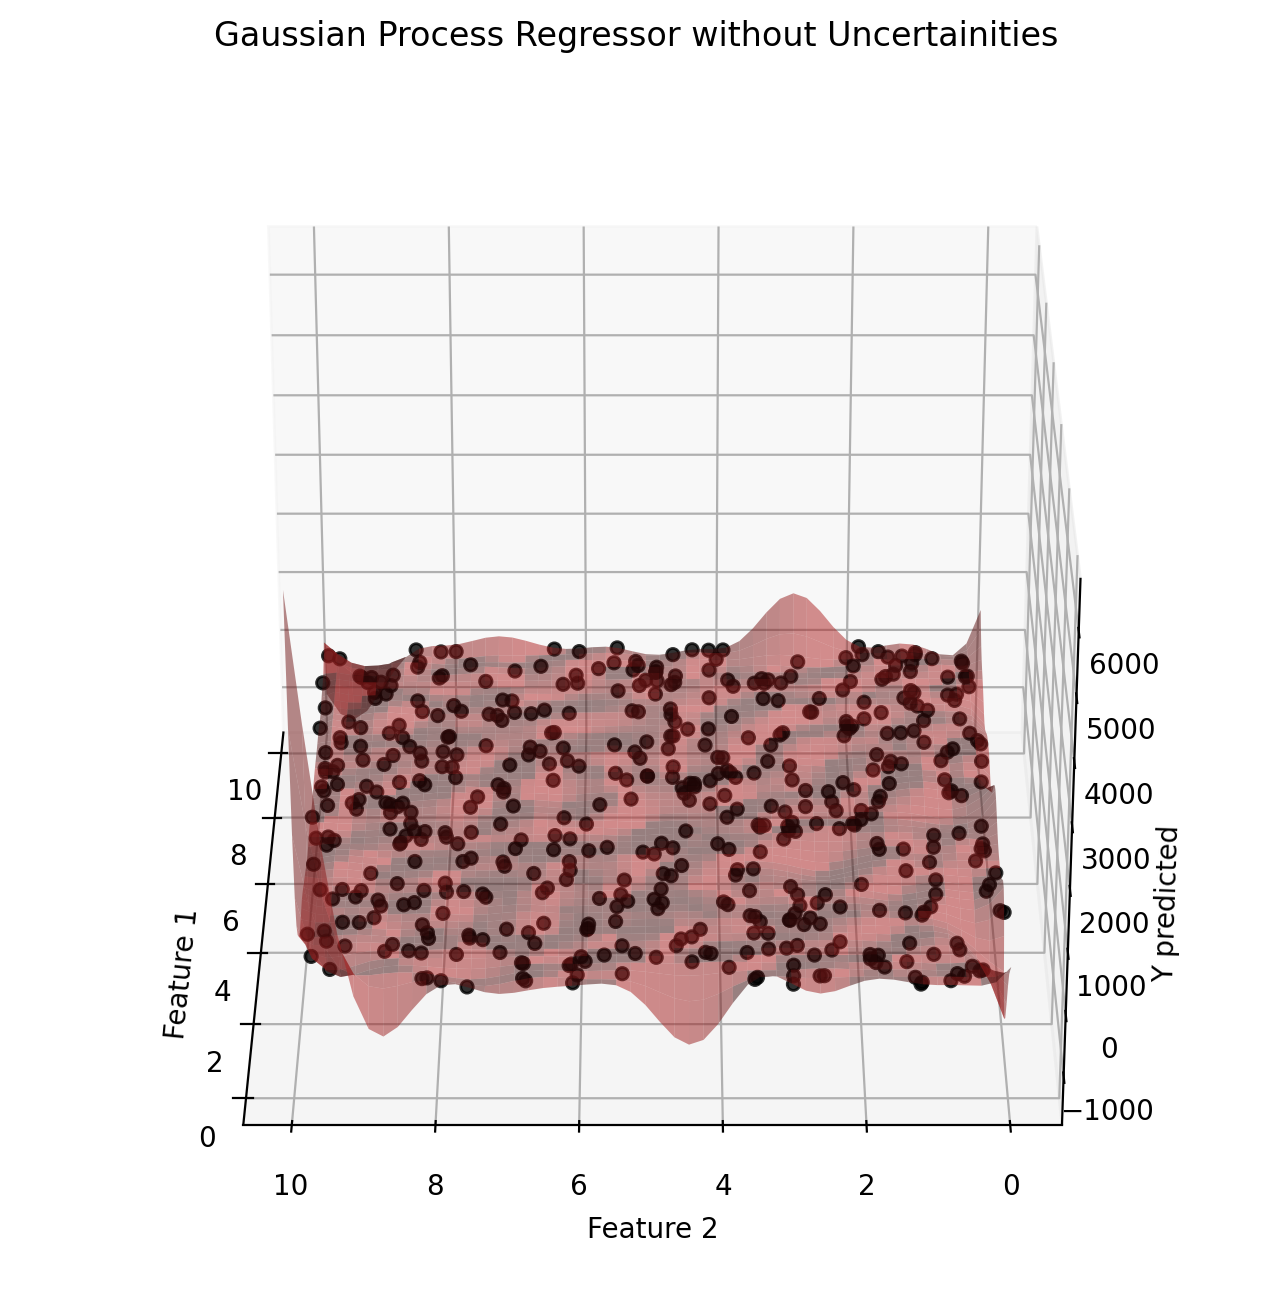

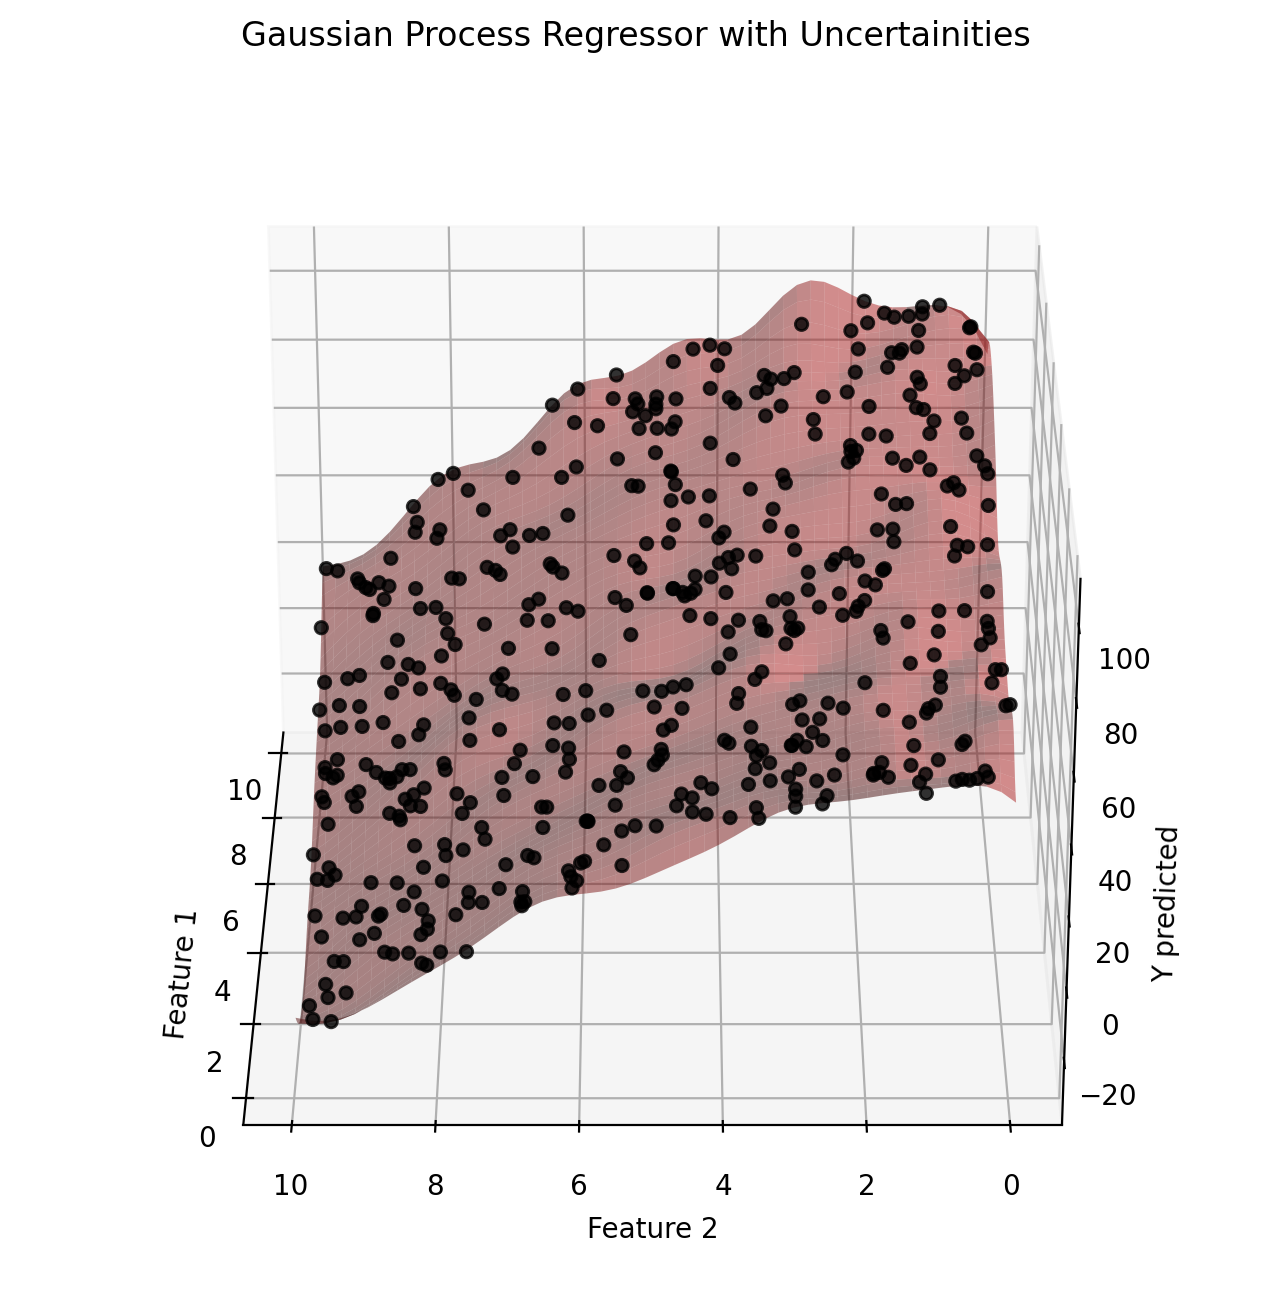

In [7]:
from sklearn.gaussian_process import GaussianProcessRegressor

model_GP = GaussianProcessRegressor()
model_GP.fit(X,y)
ypred = model_GP.predict(Xgrid).reshape(Xgrid1_new.shape)

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='black', alpha=0.8, label='Features')
ax.plot_surface(Xgrid1_new, Xgrid2_new, ypred, color='firebrick', alpha=0.5)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Y predicted')
ax.set_title('Gaussian Process Regressor without Uncertainities')

# Set the elevation and azimuthal angle
ax.view_init(elev=28, azim=180)

# Show the plot
plt.show()


model_GP = GaussianProcessRegressor(alpha=(yerr/y)**2)
model_GP.fit(X,y)
ypred = model_GP.predict(Xgrid).reshape(Xgrid1_new.shape)

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='black', alpha=0.8, label='Features')
ax.plot_surface(Xgrid1_new, Xgrid2_new, ypred, color='firebrick', alpha=0.5)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Y predicted')
ax.set_title('Gaussian Process Regressor with Uncertainities')

# Set the elevation and azimuthal angle
ax.view_init(elev=28, azim=180)

# Show the plot
plt.show()


6. Let's look finally at polynomial fitting. Fit a $4$th degree polynomial to the data. Print the best-fit regression coefficients, predict on the 2D meshgrid, and visualize interactively as before. How does this look compared to the linear model and GPR models?


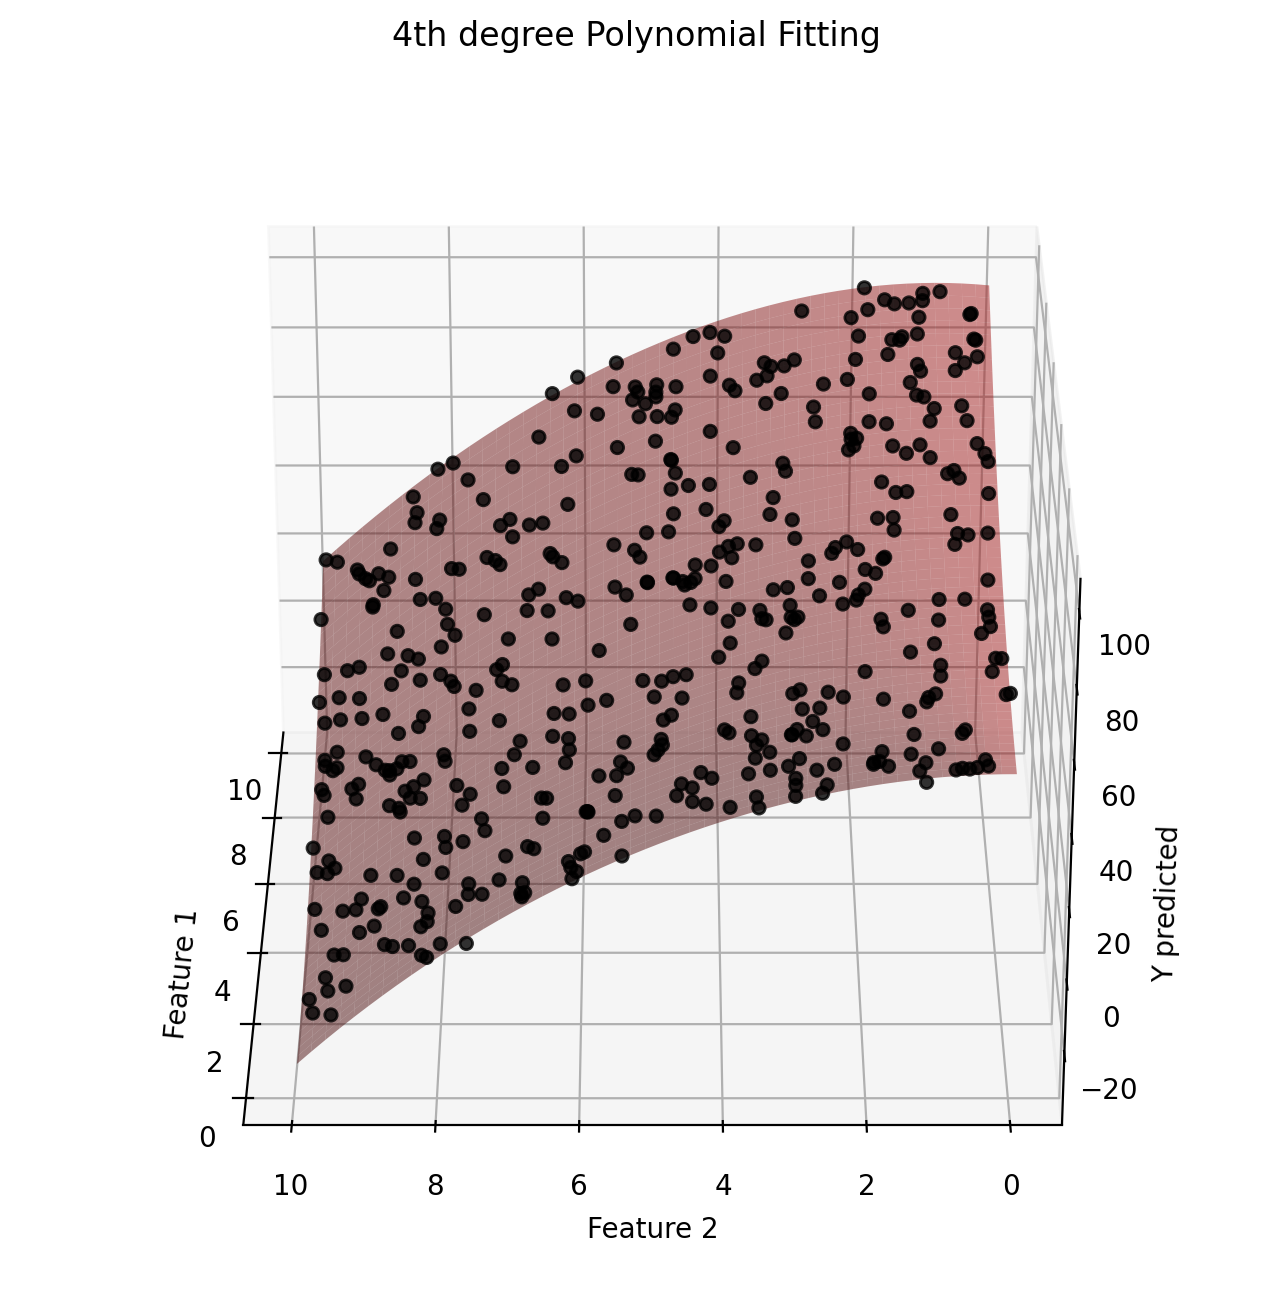

In [8]:
from astroML.linear_model import PolynomialRegression

model_PO = PolynomialRegression(4)
model_PO.fit(X,y)
ypred = model_PO.predict(Xgrid).reshape(Xgrid1_new.shape)

fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, color='black', alpha=0.8, label='Features')
ax.plot_surface(Xgrid1_new, Xgrid2_new, ypred, color='firebrick', alpha=0.5)
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Y predicted')
ax.set_title('4th degree Polynomial Fitting')

# Set the elevation and azimuthal angle
ax.view_init(elev=28, azim=180)

# Show the plot
plt.show()

7. Sticking with polynomial fitting, let's find the optimal hyper-parameters through cross-validation. 
- Using `sklearn.model_selection.train_test_split`, first do a train-test split with a `test_size` of $20\%$. Then split out $20\%$ of the training set itself as a cross-validation set (leaving a somewhat smaller set to use for training). Note that you'll need to simultaneously split out `yerr` as well by just providing this as another array to `train_test_split`.
- Compute the training and cross-validation rms errors (and from those, the BIC values) as a function of polynomial degree from $1$ to $10$ inclusive. Plot the rms errors and BIC values as a function of the polynomial degree. 
- Choose the optimal polynomial degree, and train on all training data from the first `train_test_split` operation. Predict the labels of the held-out test set, and finally compute the testing rms error.

<Figure size 800x800 with 0 Axes>

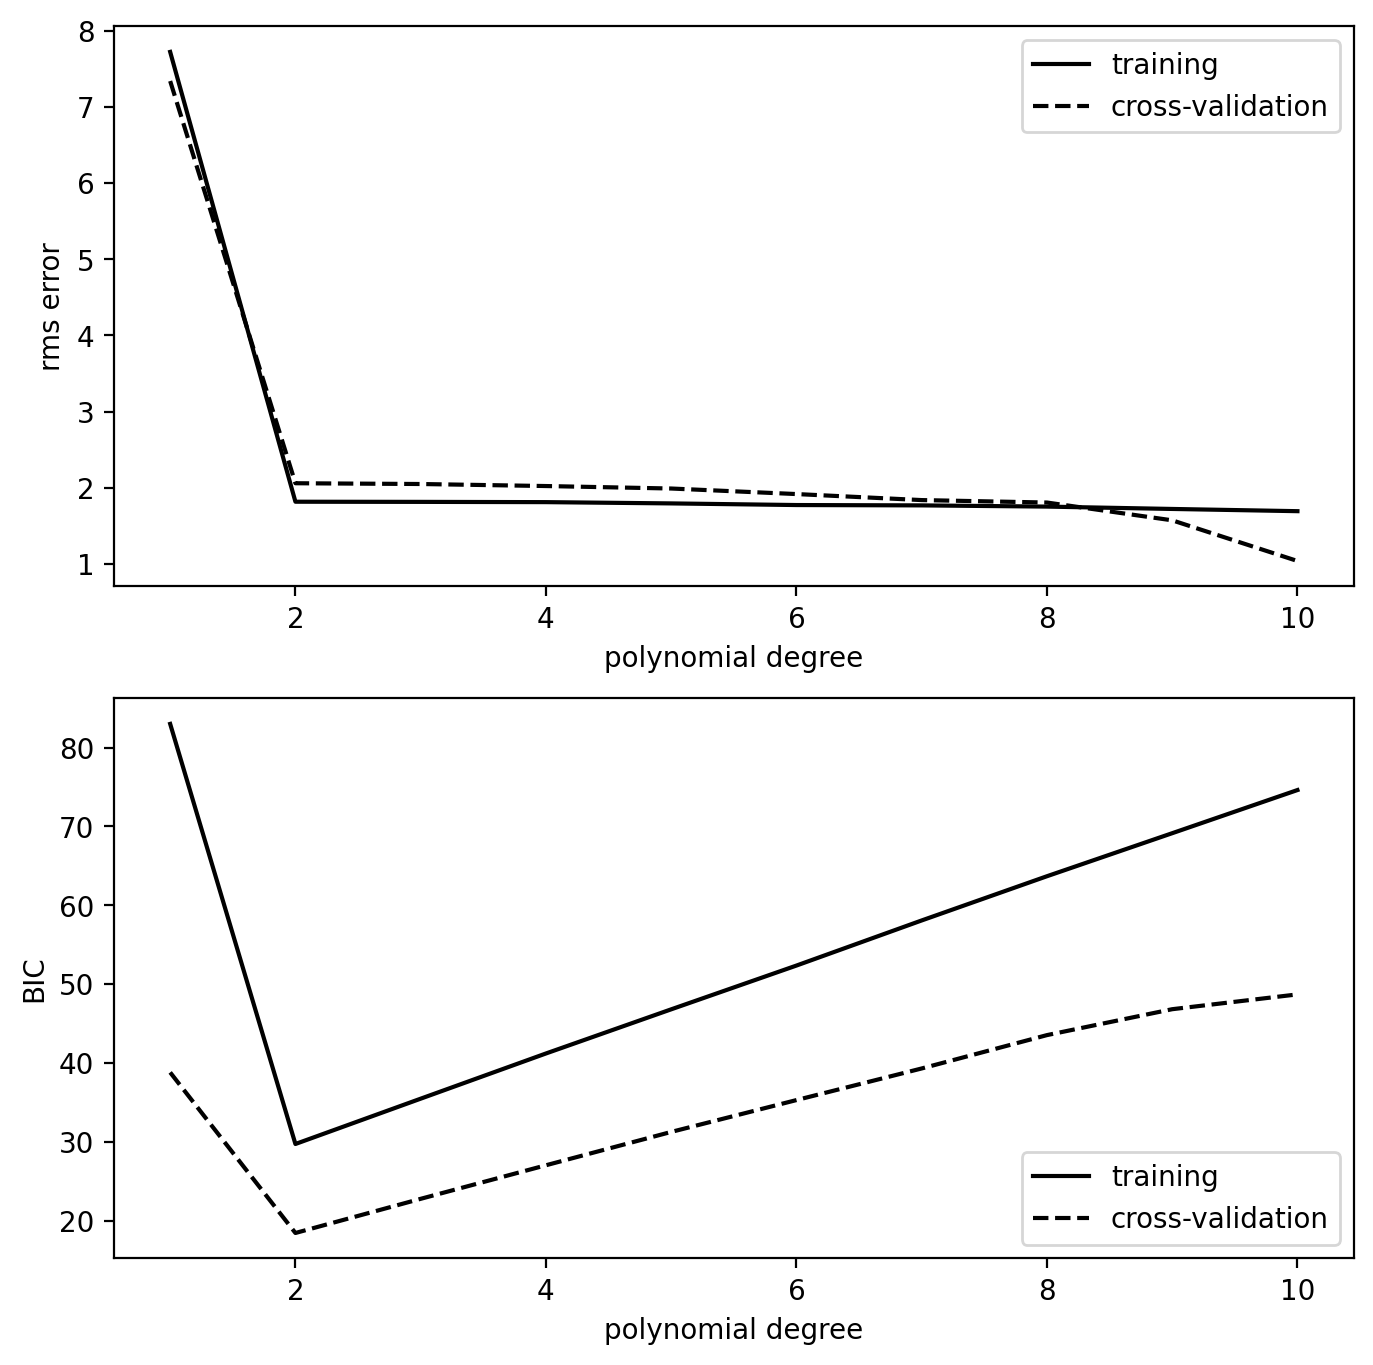

In [9]:
from sklearn.model_selection import train_test_split

data_main = np.load('./hw_data/hw7_data_1.npy')
train, test = train_test_split(data_main, test_size=0.2)
train_sub, cv = train_test_split(train, test_size=0.2)

d = np.arange(1, 11)

training_err = []
crossval_err = []

fig = plt.figure(figsize=(8, 8))
for i in range(len(d)):
    model_PO = PolynomialRegression(d[i])
    # for train_sub
    data = train_sub
    model_PO.fit(data[:,:2],data[:,2],data[:,3])
    ypred = model_PO.predict(data[:,:2])
    training_err.append(np.sqrt(np.sum((ypred - data[:,2]) ** 2)
                              / len(data)))
    # for cv
    data = cv
    model_PO.fit(data[:,:2],data[:,2],data[:,3])
    ypred = model_PO.predict(data[:,:2])
    crossval_err.append(np.sqrt(np.sum((ypred - data[:,2]) ** 2)
                              / len(data)))
data = train_sub
BIC_train = np.sqrt(len(data)) * np.array(training_err)/ np.mean(data[:,3]) + d*np.log(len(data))

data = cv
BIC_crossval = np.sqrt(len(data)) * np.array(crossval_err)/ np.mean(data[:,3]) + d*np.log(len(data))


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(211)

ax.plot(d, training_err, '-k', label='training')
ax.plot(d, crossval_err, '--k', label='cross-validation')


ax.set_xlabel('polynomial degree')
ax.set_ylabel('rms error')
ax.legend(loc='upper right')


ax = fig.add_subplot(212)
ax.plot(d, BIC_train, '-k', label='training')
ax.plot(d, BIC_crossval, '--k', label='cross-validation')


ax.legend(loc="lower right")
ax.set_xlabel('polynomial degree')
ax.set_ylabel('BIC')

plt.show()

In [10]:
print("Optimal Degree = 2")

model_PO = PolynomialRegression(2)
model_PO.fit(train[:,:2],train[:,2],train[:,3]) # fit the complete training data
ypred = model_PO.predict(test[:,:2])

testing_rms_error = np.sqrt(np.sum((ypred - test[:,2])**2)/len(test))
print("Test RMS error:",testing_rms_error)

Optimal Degree = 2
Test RMS error: 2.0814299004086765
